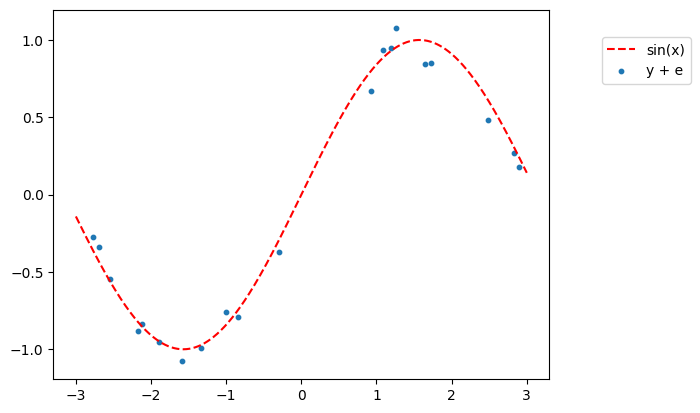

PyObject <matplotlib.legend.Legend object at 0x7ff640422650>

In [254]:
using PyPlot
using Revise

n = 20
s = 0.08

a = -3.0
b = 3.0

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


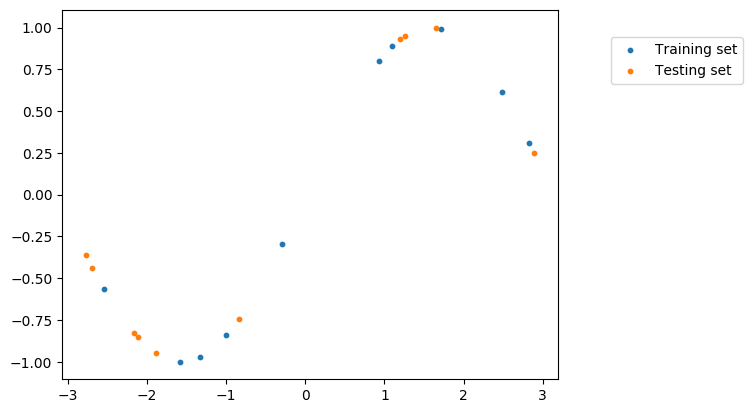

PyObject <matplotlib.legend.Legend object at 0x7ff640398c90>

In [255]:
ind = collect(1:n)

#ind_train = rand(1:n, Int(n/2))
ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [265]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sqrt(sum(dif.*dif))
end

function grad_descend(x, w0, d, step)
    i = 0
    g_norm = 1.0    
    while i<1.0e9 && g_norm > 0.05
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 1.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end




grad_descend (generic function with 2 methods)

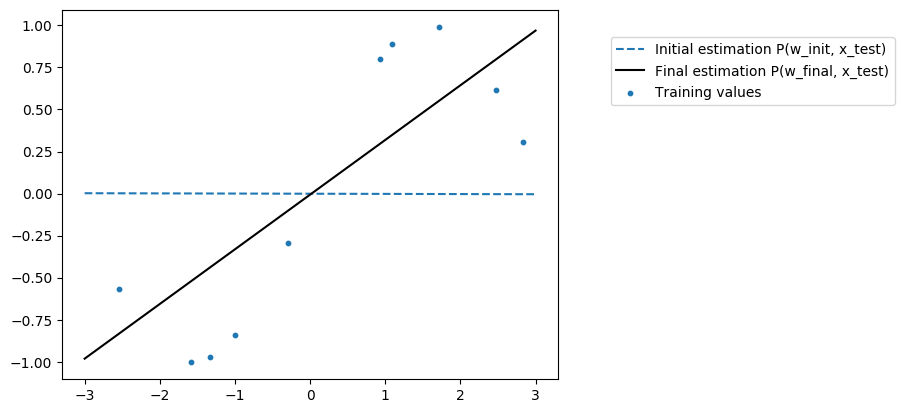

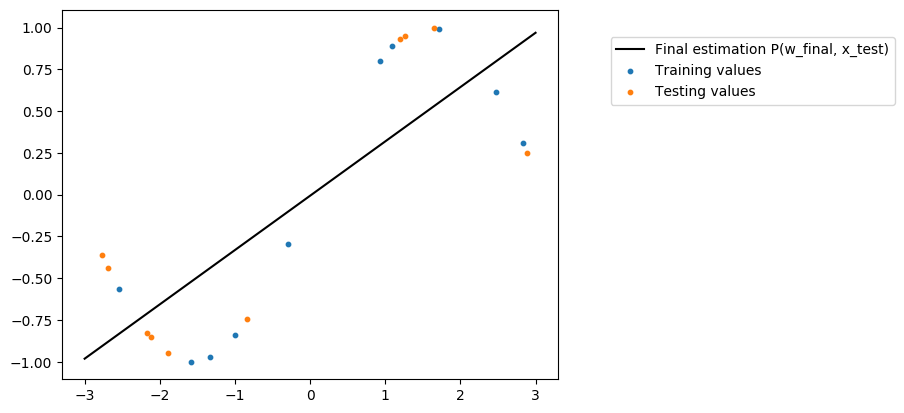

iter = 1000000
  w = [-0.008173020846249096, 0.16881329130636927]
  loss = 2.440801658592156
g norm = 11.499125500026096

iter = 2000000
  w = [-0.010601860478561627, 0.25016257778836326]
  loss = 2.1385655711011053
g norm = 5.5074754476134515

iter = 3000000
  w = [-0.010940249259008503, 0.28915350925419503]
  loss = 2.062955211893627
g norm = 2.640437982547479

iter = 4000000
  w = [-0.01042607243364287, 0.3078587267477505]
  loss = 2.0451497167262165
g norm = 1.2696043345686374

iter = 5000000
  w = [-0.009625284017533885, 0.316845957981543]
  loss = 2.040989962330642
g norm = 0.615604154949021

iter = 6000000
  w = [-0.008786969273434435, 0.3211752605064122]
  loss = 2.0399966997811556
g norm = 0.3054513324681762

iter = 7000000
  w = [-0.008012452929902242, 0.3232699443702641]
  loss = 2.039742877884936
g norm = 0.16039387783743572

iter = 8000000
  w = [-0.007335545857322211, 0.32429092057859177]
  loss = 2.0396671160818003
g norm = 0.09391315245432838

iter = 9000000
  w = [-0.0

PyObject <matplotlib.legend.Legend object at 0x7ff640082250>

In [266]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 2
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x, w_init, d, 1.0e-8)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


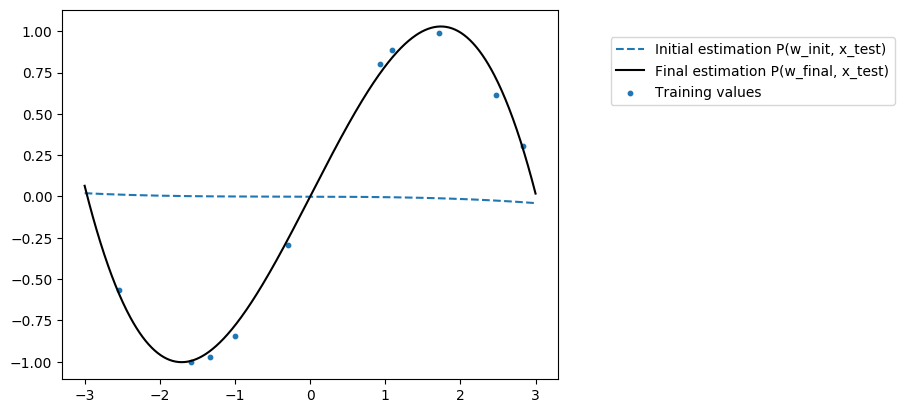

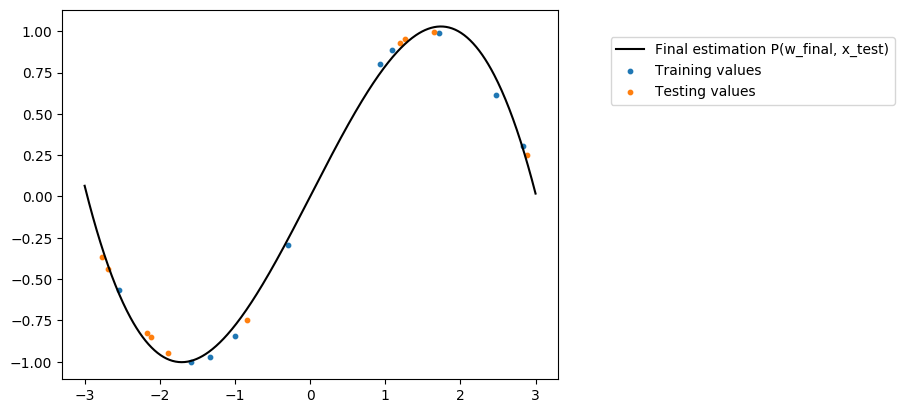

iter = 1000000
  w = [0.022199471091444, 0.5843936200976051, -0.006705614200937496, -0.053849012975965706]
  loss = 1.0216283146120466
g norm = 3.2669617413922616

iter = 2000000
  w = [0.018000602737451243, 0.78252859490614, -0.001151397584267491, -0.08375905056300946]
  loss = 0.40514486729077875
g norm = 1.1230983611591046

iter = 3000000
  w = [0.009854497465203947, 0.8506244995858563, 0.0019661463304771645, -0.09406053133205625]
  loss = 0.24282554196768869
g norm = 0.3942895040804045

iter = 4000000
  w = [0.003618818798672488, 0.8742271955155877, 0.0036619762349795917, -0.09764225493033175]
  loss = 0.21373508912170575
g norm = 0.14428449509625985

iter = 5000000
  w = [-0.00029161159686236194, 0.8825095165118451, 0.0045676060234844836, -0.09890472073354038]
  loss = 0.209344624699103
g norm = 0.05656090197420241

w final = [-0.0006871464653031385, 0.8831206362548667, 0.004653722370493817, -0.09899822215371017]


PyObject <matplotlib.legend.Legend object at 0x7ff63ff94250>

In [267]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 4
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-7)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


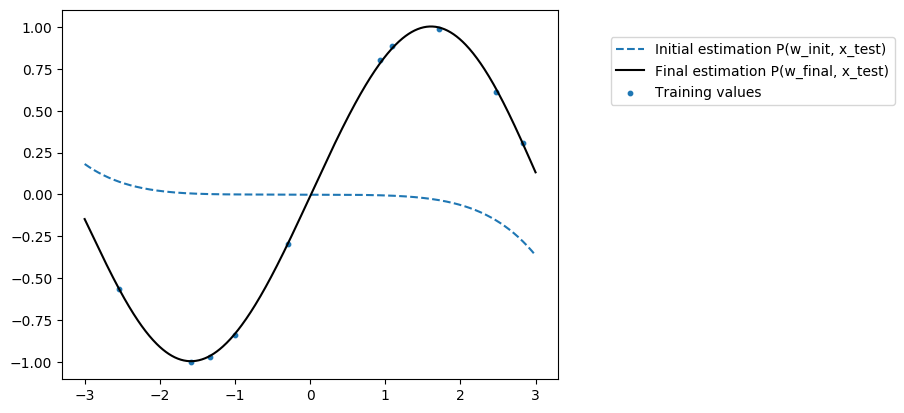

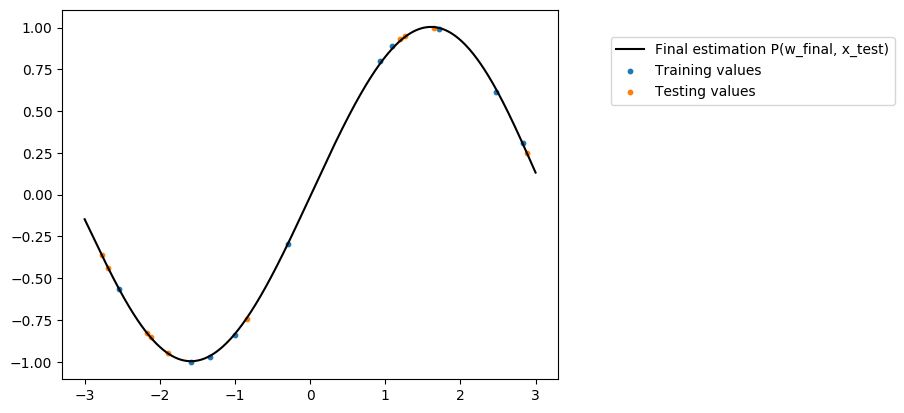

iter = 1000000
  w = [-0.0014403348106568456, 0.30413422788661987, 0.029567671544986743, 0.15900943580147495, -0.0013718495221576945, -0.02383698458515221]
  loss = 1.1782031524652334
g norm = 1.8445431855656746

iter = 2000000
  w = [-0.014690052290674594, 0.45203017198511447, 0.03266389411375823, 0.091220617311938, -0.0021215372448346098, -0.017461262768052745]
  loss = 0.9227700154664141
g norm = 1.4405942574426798

iter = 3000000
  w = [-0.023085474356805257, 0.567738659197887, 0.03275115866319542, 0.03807321154006746, -0.002423182468907979, -0.01246400624508365]
  loss = 0.7236543641890787
g norm = 1.1266502663249964

iter = 4000000
  w = [-0.02764271677755398, 0.6583567777037197, 0.03156447239713135, -0.003597932410456258, -0.002526643310441734, -0.008546058130627974]
  loss = 0.5682930064139807
g norm = 0.8821236872309004

iter = 5000000
  w = [-0.029553833586011793, 0.7293699865872879, 0.02962841145726341, -0.03629201560266447, -0.0025021888593219133, -0.005472299561158188]
  l

PyObject <matplotlib.legend.Legend object at 0x7ff63feac510>

In [268]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 6
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-7)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


iter = 1000000
  w = [-0.004497898799762319, 0.33669167476703676, 0.02672908169136187, 0.30085802129812944, -0.0015599215461670846, -0.08696883091986914, -0.0003660350480281759, 0.005751800131360408]
  loss = 0.7030926306023295
g norm = 1.5689372478078891

iter = 2000000
  w = [-0.027754263342218484, 0.4135689333209704, 0.02078715093535502, 0.3180025778643824, 0.004518423798756984, -0.10079477926415614, -0.0011020145962032672, 0.007093959174968625]
  loss = 0.5742714302420264
g norm = 0.5240885884800501

iter = 3000000
  w = [-0.040643165974992755, 0.45208645581790685, 0.018980843739396517, 0.2989420793153469, 0.0066862643884008505, -0.09805332685859218, -0.0013308518606656324, 0.006978306411472781]
  loss = 0.5370790518029951
g norm = 0.41421266029485804

iter = 4000000
  w = [-0.047041787801830215, 0.48283664198811743, 0.02060970800599417, 0.27544290353698486, 0.006506481960165747, -0.09298167409774898, -0.0013123594970734455, 0.006649871759958776]
  loss = 0.5069890498946209
g norm 

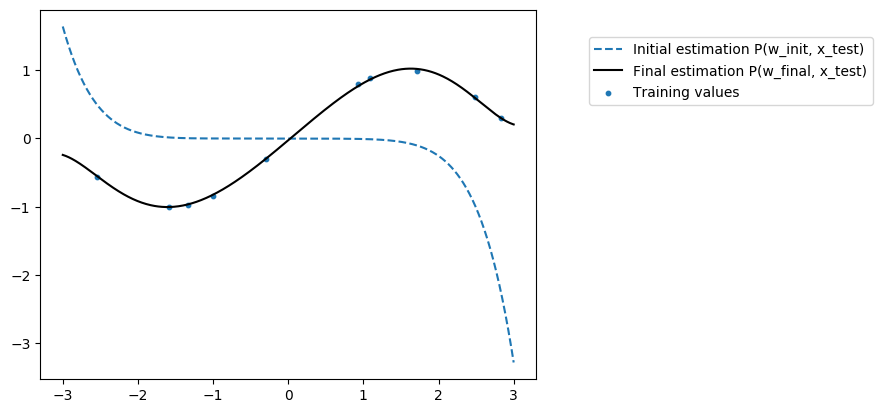

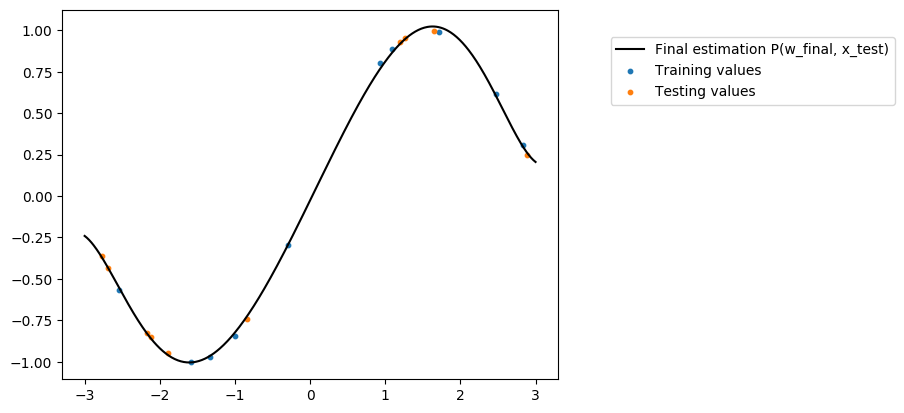


  loss = 0.07664723483060322
g norm = 0.05408728803091483

iter = 41000000
  w = [-0.026852486565465336, 0.9259630601956154, 0.025799495979315197, -0.10423054609044294, -0.005262722045663834, -0.00589435554431403, 0.0002779066903499642, 0.0007747064611903871]
  loss = 0.07292744146981493
g norm = 0.05141323808561477

w final = [-0.026326304086201693, 0.9280038738643057, 0.025339936688566777, -0.10595846851278869, -0.005187225453966517, -0.005501801951299218, 0.00027554665802305395, 0.0007484653250045277]


PyObject <matplotlib.legend.Legend object at 0x7ff63fc51050>

In [270]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 8
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-7)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [ ]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 9
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-8)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)